# 영국 시장의 중고 자동차 가격 데이터 다루기

## STEP0. 데이터 불러오기 및 탐색


In [384]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [385]:
# 경로 수정
import os
print('os.getcwd():',os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/03_Data_Preprocessing/Data')
print('os.getcwd():',os.getcwd())

os.getcwd(): /content/drive/My Drive/Colab Notebooks/03_Data_Preprocessing/Data
os.getcwd(): /content/drive/MyDrive/Colab Notebooks/03_Data_Preprocessing/Data


## 자동차정보와 자동차 브랜드 정보 불러오기
---
cars.csv와 car, brand.csv는 brand에 저장

In [386]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [387]:
# 데이터 불러오기
cars = pd.read_csv('cars.csv')
brand = pd.read_csv('brand.csv')

## 두 데이터 셋의 변수 의미 파악
---
brand데이터와 cars데이터의 변수가 의미하는 걸 파악해본다.

In [388]:
# 불러온 데이터 확인 - brand
brand.info()
brand.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


- brand데이터는 자동차의 브랜드(title)와 국가(country)를 담고 있다. 데이터 타입이 모두 object형이고, null값은 없다.
- title컬럼의 고유값을 확인해 중복데이터가 있는지 살펴본다.

In [389]:
# brand.title에서 중복값 확인
brand.title.nunique()
# brand.title.value_counts()

48

- brand데이터 48개의 행이 모두 다른 값을 가짐을 알 수 있다.
- brand데이터들의 값들이 오염되지 않았는지 확인해본다. brand데이터의 크기가 크지 않으므로, unique()를 이용해 고유값을 추출해본다.

In [390]:
# brand에서 title의 고유값
print("title고유값:" , brand.title.unique())
print("country고유값:", brand.country.unique())

title고유값: ['skoda' 'vauxhall' 'hyundai' 'mini' 'ford' 'volvo' 'peugeot' 'bmw'
 'citroen' 'mercedes-benz' 'mazda' 'saab' 'volkswagen' 'honda' 'mg'
 'toyota' 'seat' 'nissan' 'alfa' 'renault' 'kia' 'proton' 'fiat' 'audi'
 'mitsubishi' 'lexus' 'land' 'chevrolet' 'suzuki' 'dacia' 'daihatsu'
 'jeep' 'jaguar' 'chrysler' 'rover' 'ds' 'daewoo' 'dodge' 'porsche'
 'subaru' 'infiniti' 'abarth' 'smart' 'marcos' 'maserati' 'ssangyong'
 'lagonda' 'isuzu']
country고유값: ['Czech Republic' 'United Kingdom' 'South Korea' 'United States' 'Sweden'
 'France' 'Germany' 'Japan' 'Spain' 'Italy' 'Malaysia' 'Romania']


- title, country 모두 정상적인 값을 가짐을 확인할 수 있다.

- 이번에는 cars 데이터를 확인해본다.

In [391]:
# 불러온 데이터 확인 - cars
cars.info()
display(cars.head(3))
display(cars.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full
3686,VAUXHALL CORSA,2000,82160,2013,7.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN


- cars데이터는 총 3687행이고 13개의 컬럼이 존재한다.
- 결측치가 존재하는 컬럼이 있음을 알 수 있다.
- 각각의 변수의 의미를 제대로 파악하기 위해, 통계량을 확인해본다(결측치와 이상치처리는 다음 단계에서 실시한다.)

In [392]:
# 수치형 변수의 통계량 -  cars
cars.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [393]:
# 범주형 변수의 통계량 - cars
cars.describe(include = 'object')

,title,Fuel type,Body type,Engine,Gearbox,Emission Class,Service history
count,3687,3687,3687,3642,3687,3600,540
unique,455,6,10,34,2,6,1
top,VAUXHALL CORSA,Petrol,Hatchback,1.6L,Manual,Euro 5,Full
freq,223,2362,2280,736,2870,1257,540


In [394]:
# 범주형 변수의 고유값 확인 - Fuel type
cars['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid',
       'Electric', 'Diesel Hybrid'], dtype=object)

In [395]:
# 범주형 변수의 고유값 확인 - Body type
cars['Body type'].unique()

array(['Hatchback', 'Coupe', 'Estate', 'Saloon', 'Convertible', 'MPV',
       'SUV', 'Minibus', 'Combi Van', 'Pickup'], dtype=object)

In [396]:
# 범주형 변수의 고유값 확인 - Engine
cars['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [397]:
# 범주형 변수의 고유값 확인 - Gearbox
cars['Gearbox'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [398]:
# 범주형 변수의 고유값 확인 - Emission Class
cars['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [399]:
# 범주형 변수의 고유값 확인 - Service history
cars['Service history'].unique()

array([nan, 'Full'], dtype=object)

- cars데이터의 변수는 아래와 같은 의미가 있다.

```
  Title          : 자동차 브랜드명   
  Price          : 중고차의 가격  
  Mileage(miles) : 총 주행거리   
  Registration_Year : 등록년도  
  Previous Owners : 이전 소유자 수   
  Fuel type       : 연료의 종류     
  Body type       : 차체 유형  
  Engine          : 엔진 배기량  
  Gearbox         : 변속기  
  Doors           : 사람이 타고 내리는 문의 개수  
  Seats           : 자동차의 좌석수  
  Emission Class  : 자동차 배기가스 등급. Euro1이 가장 초기의 기본적인 배출 규제이고 Euro 6가 가장 최신의 엄격한 기준.  
  Service history : 자동차 정비 이력. 해당 데이터에서는 FULL(완전한 정비이력), nan으로 나뉨.  
```
  - 이후 데이터 변수에 쉽게 접근하게 위해 몇몇 컬럼명을 변환해준다.

  ```
  'Mileage(miles)': 'Mileage'
  'Registration_Year': 'Reg_year'
  'Previous Owners': 'Pre_owners'
  'Fuel type': 'Fuel_type'
  'Body type': 'Body_type'
  'Emission Class': 'Emission_class'
  'Service history': 'Service_history'
  ```

In [400]:
# 데이터 컬럼명 변환
cars = cars.rename({'Mileage(miles)': 'Mileage',
                  'Registration_Year': 'Reg_year',
                  'Previous Owners': 'Pre_owners',
                  'Fuel type': 'Fuel_type',
                  'Body type': 'Body_type',
                  'Emission Class': 'Emission_class',
                  'Service history': 'Service_history'}, axis = 1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   Price            3687 non-null   int64  
 2   Mileage          3687 non-null   int64  
 3   Reg_year         3687 non-null   int64  
 4   Pre_owners       2276 non-null   float64
 5   Fuel_type        3687 non-null   object 
 6   Body_type        3687 non-null   object 
 7   Engine           3642 non-null   object 
 8   Gearbox          3687 non-null   object 
 9   Doors            3662 non-null   float64
 10  Seats            3652 non-null   float64
 11  Emission_class   3600 non-null   object 
 12  Service_history  540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


- 컬럼명을 변환한 cars 데이터를 cars_df에 저장해준다.

In [401]:
# cars 데이터 복사
cars_df = cars.copy()
cars_df.shape

(3687, 13)

## 데이터타입 변환
---
- Engine: 배기량에 따른 중고차가격의 차이를 확인해보기 위해 수치형으로 변환
- Emission_class: Euro 1에서 Euro 6으로 갈수록 더 최신에 만들어졌으며, 엄격한 규제가 적용된 자동차이다. 수치형 변수로 바꾸어, 이후 숫자가 커짐에 따라 중고차 가격의 변화가 있는지 확인해본다.



### 배기량(Engine)컬럼의 데이터를 수치형으로 변환


In [402]:
#  Engine의 고유값 확인
cars['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [403]:
# Engine에서 문자열 L을 제거하여 수치형으로 변경
cars['Engine'] = cars['Engine'].str[:3].astype(float)
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   Price            3687 non-null   int64  
 2   Mileage          3687 non-null   int64  
 3   Reg_year         3687 non-null   int64  
 4   Pre_owners       2276 non-null   float64
 5   Fuel_type        3687 non-null   object 
 6   Body_type        3687 non-null   object 
 7   Engine           3642 non-null   float64
 8   Gearbox          3687 non-null   object 
 9   Doors            3662 non-null   float64
 10  Seats            3652 non-null   float64
 11  Emission_class   3600 non-null   object 
 12  Service_history  540 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 374.6+ KB


,title,Price,Mileage,Reg_year,Pre_owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN


- Engine컬럼이 float형으로 변환되었음을 확인할 수 있다.



### 배기가스 등급(Emission_class)컬럼의 데이터를 수치형으로 변환


In [404]:
#  Emission_class의 고유값 확인
cars['Emission_class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [405]:
# Emission_class을 수치형으로 변환
cars['Emission_class'] = pd.to_numeric(cars['Emission_class'].str[-1])
cars.info()
cars.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   Price            3687 non-null   int64  
 2   Mileage          3687 non-null   int64  
 3   Reg_year         3687 non-null   int64  
 4   Pre_owners       2276 non-null   float64
 5   Fuel_type        3687 non-null   object 
 6   Body_type        3687 non-null   object 
 7   Engine           3642 non-null   float64
 8   Gearbox          3687 non-null   object 
 9   Doors            3662 non-null   float64
 10  Seats            3652 non-null   float64
 11  Emission_class   3600 non-null   float64
 12  Service_history  540 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 374.6+ KB


,title,Price,Mileage,Reg_year,Pre_owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN


- 배출가스등급에 결측치가 있어 int형으로 바로 변환하지 못하고 pd.to_numeric()을 이용하여 float형으로 변환했다.

## 결측치 처리하기



### cars데이터셋에서 결측치 확인
---
- 컬럼별로 결측치를 확인해본다.

In [406]:
# 각 컬럼의 결측치 개수를 확인 - 결측치 개수가 큰 순서대로 정렬
cars.isna().sum().sort_values(ascending = False)

,0
Service_history,3147
Pre_owners,1411
Emission_class,87
Engine,45
Seats,35
Doors,25
title,0
Price,0
Mileage,0
Reg_year,0


In [407]:
# 각 컬럼의 결측치 비율 확인 - 결측치 비율이 큰 순서대로 정렬
cars_df.isna().mean().sort_values(ascending = False)

,0
Service_history,0.853539
Pre_owners,0.382696
Emission_class,0.023596
Engine,0.012205
Seats,0.009493
Doors,0.006781
title,0.000000
Price,0.000000
Mileage,0.000000
Reg_year,0.000000


- 결측치가 존재하는 컬럼은 6개이다.
- 결측치가 존재하는 컬럼은 Service_history, Pre_owners, Emission_class, Engine, Seats, Doors이다.
- 여기서 정비이력을 나타내는 Service history의 결측치는 전체데이터의 무려 85%를 차지한다.
- Pre_owners는 38%정도 차지한다.
- 나머지 4개의 컬럼은 전체 데이터의 3%이하로 많은 부분을 차지하지는 않는다.
- 범주형변수에 대해서는 데이터를 불러올 때 변수의 의미를 알기 위해 고유값을 살펴보았다. 그 때 결측치가 발견된 문자형변수들은 수치형으로 변환되었다. 따라서 결측치는 수치형변수만 살펴보면 된다.


 Service_history -> Pre_owners -> Emission_class, Engine, Seats, Doors순으로 결측치를 다루려고 한다.

### 정비이력(Service_history)의 결측치
---
- 정비이력의 결측치는 전체데이터의 85%를 넘게 차지한다.
- 정비이력기록의 유무가 범주형 변수로 작용할 수 있게 결측치를 삭제하지 않고, 'Unknown'으로 채워넣어준다.

In [408]:
# Service_history 결측치를 'Unknown'이라는 값으로 채우기
cars['Service_history'] = cars['Service_history'].fillna('Unknown')
print("Service_history컬럼의 결측치개수: ", cars['Service_history'].isna().sum())
print("Service_history컬럼의 범주: ", cars['Service_history'].unique())

Service_history컬럼의 결측치개수:  0
Service_history컬럼의 범주:  ['Unknown' 'Full']


### 이전 소유자의 수(Pre_owners)의 결측치
---
- Pre_owners의 결측치는 전체데이터의 38%가 넘게 차지한다.
- Pre_owners는 정수형이므로, 고유값으로 확인해본다.

In [409]:
# Pre_owners는 정수형이므로, 고유값으로 확인
cars['Pre_owners'].value_counts(dropna = False).sort_index()

,count
Pre_owners,
1.0,523
2.0,594
3.0,475
4.0,360
5.0,208
6.0,60
7.0,39
8.0,12
9.0,5


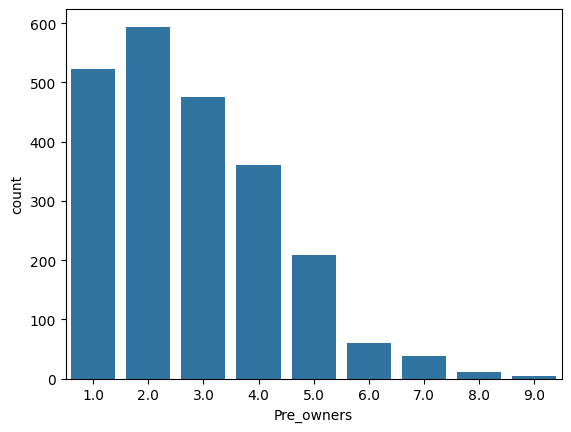

In [410]:
# Pre_owners 시각화
sns.barplot(data = cars['Pre_owners'].value_counts(dropna = False))
plt.show()

In [411]:
# 이전 소유자가 9명인 데이터
cars[cars['Pre_owners'] == 9]

,title,Price,Mileage,Reg_year,Pre_owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown


- 이전 소유자수는 1명 ~ 9명까지 분포되어 있다.
- 9명이 많아 보이긴 하지만, 비현실적 데이터로 보이지는 않는다.
- 결측치를 중간값이나 평균으로 대체하기에는, 상품의 신뢰도에 영향을 끼칠 수 있다.

이전에 Service_history변수에 85%의 결측치를 채워넣었다. 이전 소유자 수가 많아짐에 따라 Service_history에서 Unknown의 개수가 많아진다면, 그 상품의 신뢰도가 떨어진다고 볼 수 있다. 확인해보자.

In [412]:
# Pre_owners와 Service_history을 기준으로 그룹화
cars.groupby(['Pre_owners', 'Service_history']).size()

Pre_owners  Service_history
1.0         Full               169
            Unknown            354
2.0         Full               109
            Unknown            485
3.0         Full                80
            Unknown            395
4.0         Full                36
            Unknown            324
5.0         Full                16
            Unknown            192
6.0         Unknown             60
7.0         Unknown             39
8.0         Unknown             12
9.0         Unknown              5
dtype: int64

In [413]:
# 참고
print('이전 소유자수의 평균: ',cars['Pre_owners'].mean())
print('이전 소유자수의 중간값: ',cars['Pre_owners'].median())

이전 소유자수의 평균:  2.8075571177504393
이전 소유자수의 중간값:  3.0


In [414]:
# Pre_owners와 다른 수치형 변수들과의 상관관계
cars.corr(numeric_only = True)['Pre_owners']

,Pre_owners
Price,-0.479424
Mileage,0.316160
Reg_year,-0.501045
Pre_owners,1.000000
Engine,0.195676
Doors,-0.153262
Seats,-0.029338
Emission_class,-0.476526


- 이전 소유자의 수가 많아질수록 정비기록이 없는 비율이 점점 커지며, 이전 소유자수가 6명이상이 되면 모두 정비기록이 없는 차로 분류된다.
- 이전 소유자수가 없다는 건 상품을 신뢰하기 어렵다는 의미이므로 중간값이나 평균으로 채우는데 무리가 있어보인다.
- 또한 결측치 비율이 38%로 많은 편이므로 하나의 숫자로 채운다면 기존의 데이터의 분포에 변화가 생긴다.
- 등록년수와 배출가스등급이 이전 소유자수와 상관관계가 있어, 이전 소유자수에 대한 설명을 어느정도 대체할 수 있을거라 판단된다(Price는 target변수 쓰일 수 있어 고려하지 않음).


따라서 Pre_owners의 컬럼을 삭제해준다.


In [415]:
# Pre_owners 컬럼 삭제
cars = cars.drop('Pre_owners', axis = 1)

cars.info()
cars.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   Price            3687 non-null   int64  
 2   Mileage          3687 non-null   int64  
 3   Reg_year         3687 non-null   int64  
 4   Fuel_type        3687 non-null   object 
 5   Body_type        3687 non-null   object 
 6   Engine           3642 non-null   float64
 7   Gearbox          3687 non-null   object 
 8   Doors            3662 non-null   float64
 9   Seats            3652 non-null   float64
 10  Emission_class   3600 non-null   float64
 11  Service_history  3687 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 345.8+ KB


,title,Price,Mileage,Reg_year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown


- Pre_owners의 컬럼이 삭제되어 12개의 컬럼이 되었음을 알 수있다.

### Emission Class, Engine, Seats, Doors의 결측치
---
전체 데이터에서 결측치가 하나라도 존재하는 데이터의 비율을 확인해본다.

In [416]:
# 남은 결측치 개수 확인
cars.isna().sum()

,0
title,0
Price,0
Mileage,0
Reg_year,0
Fuel_type,0
Body_type,0
Engine,45
Gearbox,0
Doors,25
Seats,35


In [417]:
# 결측치가 하나라도 존재하는 데이터의 비율
cars.isna().sum().sum() / len(cars)

0.05207485760781123

- 전체 데이터에서 5.2%정도로 크지 않는 부분을 차지하므로, 결측치가 있는 데이터는 모두 삭제해준다.

In [418]:
# 결측치 데이터 삭제
print(f"결측치 삭제 전 데이터 크기: {cars.shape}")
cars = cars.dropna()
print(f"결측치 삭제 후 데이터 크기: {cars.shape}")

결측치 삭제 전 데이터 크기: (3687, 12)
결측치 삭제 후 데이터 크기: (3593, 12)


- 데이터의 개수가 3593으로 줄어들었음을 확인할 수 있다.
- 결측치를 처리한 데이터를 cars_removed에 저장해준다.

In [419]:
cars.describe(include = 'object')

,title,Fuel_type,Body_type,Gearbox,Service_history
count,3593,3593,3593,3593,3593
unique,423,5,9,2,2
top,VAUXHALL CORSA,Petrol,Hatchback,Manual,Unknown
freq,222,2319,2224,2844,3059


In [420]:
# 결측치를 처리한 데이터를 cars_removed에 저장
cars_removed = cars.copy()

## 이상치 살펴보기



### 수치형 데이터의 이상치 살펴보기
---
수치형 데이터의 기술통계량을 살펴본다.

In [421]:
# 수치형 데이터의 기술통계량
cars.describe(exclude = 'object')

,Price,Mileage,Reg_year,Engine,Doors,Seats,Emission_class
count,3593.000000,3.593000e+03,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000
mean,5791.841637,8.151118e+04,2011.953799,1.603173,4.318675,4.898692,4.915113
std,4515.066997,3.954136e+04,4.741254,0.485475,0.986281,0.575368,0.901791
min,400.000000,1.000000e+00,1993.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,1.300000,3.000000,5.000000,4.000000
50%,3999.000000,8.000000e+04,2012.000000,1.600000,5.000000,5.000000,5.000000
75%,7999.000000,1.030990e+05,2016.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,6.300000,5.000000,7.000000,6.000000


- Price변수의 경우, 이후 중고차 가격 예측을 위한 target으로 사용될 수 있으므로 이상치가 의심되더라도 처리하지 않는다.
- Reg_year의 데이터타입은 int이면서 정상범위에서 데이터가 존재함을 알 수 있다.
- Doors, Seats의 데이터도 모두 정상범위에서 존재하는 것으로 보이나, 정수형이 아닌 데이터가 있는지 확인해볼 필요가 있어보인다.
- Mileage와 Engine데이터의 경우, 최댓값이 다른 지나치게 큰 것 같아 확인해볼 필요가 있어보인다.
- Emission_class는 수치형으로 변환할 때 이미 1~6사이의 정수데이터를 가짐을 확인했다.

#### 이상치 살펴보기: Doors, Seats
---
두 변수에 대한 고유값을 확인해본다.


In [422]:
# Doors 변수에 대한 고유값
cars['Doors'].value_counts().sort_index()

,count
Doors,
2.0,208
3.0,733
4.0,358
5.0,2294


In [423]:
# Seats 변수에 대한 고유값
cars['Seats'].value_counts().sort_index()

,count
Seats,
2.0,24
3.0,2
4.0,527
5.0,2919
6.0,3
7.0,118


- 두 변수 모두 정수값이 실수형태로 존재함을 확인된다.

#### 이상치 살펴보기: Mileage, Engine
---
먼저 Mileage변수를 확인해본다.

<Axes: xlabel='Mileage'>

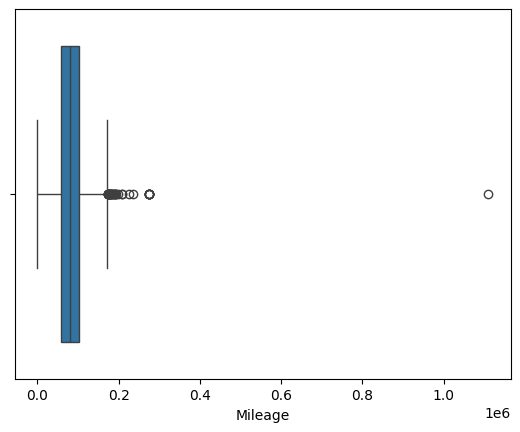

In [424]:
# Mileage에 대한 boxplot
# sns.histplot(cars_df, x = 'Mileage')
sns.boxplot(cars_df, x = 'Mileage')

In [425]:
# Mileage데이터를 내림차순으로 정렬하고 상위 10개 데이터 확인
cars_df.sort_values('Mileage',ascending = False).head(10)

,title,Price,Mileage,Reg_year,Pre_owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
1037,VOLKSWAGEN BEETLE,2495,1110100,2003,4.0,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,NaN
2048,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1478,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1259,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1685,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1283,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1933,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1946,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
244,AUDI A6 AVANT,2600,234680,2011,1.0,Diesel,Estate,2.0L,Manual,5.0,5.0,Euro 5,NaN
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN


- 주행거리가 1110100마일인 데이터는 1개이다. 그리고 바로 다음으로 주행거리가 274100마일로 급격하게 줄어든다.
- 주행거리가 1110100마일이라는 말은 178만km를 넘는다는 말이다. 심지어 정비기록도 없다. 판매하기에 적합하지 못한 차량으로 판단되어 데이터를 삭제해준다.

In [426]:
# Mileage의 최댓값인 데이터를 삭제
print(f"mileage 이상치 데이터 삭제 전 데이터의 크기: {cars.shape}")
cars = cars[cars['Mileage'] != max(cars['Mileage'])]
print(f"mileage 이상치 데이터 삭제 후 데이터의 크기: {cars.shape}")

mileage 이상치 데이터 삭제 전 데이터의 크기: (3593, 12)
mileage 이상치 데이터 삭제 후 데이터의 크기: (3592, 12)


- Engine데이터에 대해 알아본다.

<Axes: xlabel='Engine'>

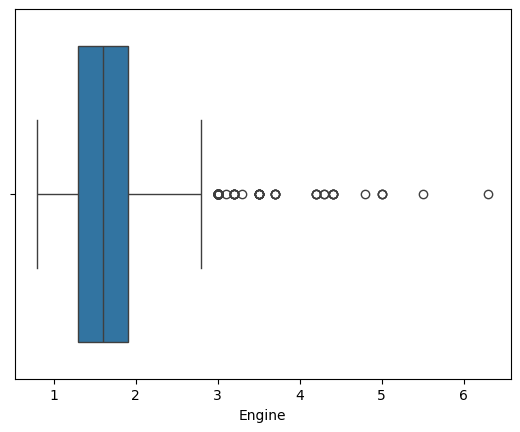

In [427]:
# Engine에 대한 boxplot
sns.boxplot(cars, x = cars['Engine'])

In [428]:
# Engine > 3인 데이터를 내림차순으로 정렬 후 상위 10개 데이터 추출
cars[cars['Engine'] > 3].sort_values('Engine',ascending = False).head(10)

,title,Price,Mileage,Reg_year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
3049,MERCEDES-BENZ M CLASS,10850,107500,2007,Petrol,SUV,6.3,Automatic,5.0,5.0,4.0,Unknown
2199,MERCEDES-BENZ CL,10000,90000,2007,Petrol,Coupe,5.5,Automatic,2.0,4.0,4.0,Full
406,FORD MUSTANG,5000,99350,2005,Petrol,Coupe,5.0,Automatic,2.0,4.0,6.0,Unknown
569,MERCEDES-BENZ CLS,3995,84000,2005,Petrol,Saloon,5.0,Automatic,4.0,4.0,4.0,Full
1740,MERCEDES-BENZ E CLASS,3995,73100,2002,Petrol,Saloon,5.0,Automatic,4.0,5.0,3.0,Unknown
2433,BMW 7 SERIES,4000,83000,2006,Petrol,Saloon,4.8,Automatic,4.0,5.0,4.0,Full
1125,BMW X5,3950,125000,2005,Petrol,SUV,4.4,Automatic,5.0,5.0,3.0,Unknown
2705,BMW X5,12000,86000,2010,Petrol,SUV,4.4,Automatic,5.0,5.0,5.0,Unknown
1177,LAND ROVER RANGE ROVER SPORT,3950,135000,2005,Petrol,SUV,4.4,Automatic,5.0,5.0,3.0,Unknown
707,LAND ROVER RANGE ROVER,2950,139000,2003,Petrol,SUV,4.4,Automatic,5.0,5.0,3.0,Unknown


- boxplot에서 이상치로 표시된 값들 중 최댓값인 6.3의 경우, SUV차량으로 차체가 크고 Doors의 개수가 가장 많은 5개가 있다. 이 점을 고려하면 충분히 가능한 값이다.
- 여기서 Engine의 이상치를 제거하지 않고, 후에 로그변환을 해주는 방법으로 진행하려고 한다.

### 범주형 데이터의 이상치 살펴보기
---
범주형 데이터의 경우, 처음 데이터를 불러왔을 때 확인했듯이 결측치 외에는 모두 컬럼속성에 맞는 데이터가 존재했다.  

범주형 데이터에서 기술통계량을 다시 살펴본다.

In [429]:
# 범주형 변수의 기술통계량
cars.describe(include = 'object')

,title,Fuel_type,Body_type,Gearbox,Service_history
count,3592,3592,3592,3592,3592
unique,423,5,9,2,2
top,VAUXHALL CORSA,Petrol,Hatchback,Manual,Unknown
freq,222,2318,2223,2844,3058


- Fuel_type,	Body_type,	Gearbox,	Service_history에서 특별한 점은 보이지 않는다.
- title 컬럼에서 고유값이 423개로 지나치게 많음을 알 수 있다. 고유값을 출력해보고 brand에 있는 title과 비교해본다.

In [430]:
# 범주형 변수의 고유값 - title
cars['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'PEUGEOT 207', 'FORD FIESTA',
       'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1', 'CITROEN C4',
       'VAUXHALL ASTRA', 'FORD MONDEO', 'MERCEDES-BENZ A180',
       'PEUGEOT 407', 'FORD KA', 'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2',
       'SAAB 9-3', 'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'VOLKSWAGEN PASSAT',
       'KIA SPORTAGE', 'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES',
       'HONDA CR-V', 'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA',
       'RENAULT MEGANE', 'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3',
       'AUDI A6 SALOON', 'TOYOTA YARIS', 'FIAT 500',
       'MERCEDES-BENZ M CLASS', 'AUDI A4', 'PEUGEOT 308 SW',

In [431]:
# brand에서 title
brand['title']

,title
0,skoda
1,vauxhall
2,hyundai
3,mini
4,ford
5,volvo
6,peugeot
7,bmw
8,citroen
9,mercedes-benz


- title의 고유값 개수가 423개로 brand 데이터셋에 있는 고유값 48개보다 훨씬 많다. cars의 title에서 브랜드명만 추출해 고유값의 범주를 줄여줄 필요가 있다.
- 브랜드명을 제외한 차종을 name이라는 컬럼으로 추가해준다.